# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income= 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response,indent=4,sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19124506,
            "id": 1,
            "last_updated": 1660803567,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 448973018523,
                    "percent_change_1h": 0.0419830684076763,
                    "percent_change_24h": -3.65173971973109,
                    "percent_change_7d": -1.97299734635255,
                    "percentage_change_1h": 0.0419830684076763,
                    "percentage_change_24h": -3.65173971973109,
                    "percentage_change_7d": -1.97299734635255,
                    "price": 23476.0,
                    "volume_24h": 27751313262
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19124506,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response,indent=4,sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120144850,
            "id": 1027,
            "last_updated": 1660803540,
            "max_supply": 120144435,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 222598983685,
                    "percent_change_1h": 0.0402350297863136,
                    "percent_change_24h": -4.6999275715668,
                    "percent_change_7d": -0.0066632365766808,
                    "percentage_change_1h": 0.0402350297863136,
                    "percentage_change_24h": -4.6999275715668,
                    "percentage_change_7d": -0.0066632365766808,
                    "price": 1852.76,
                    "volume_24h": 17511720230
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120144850,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "nu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The current price of BTC is ${btc_price}")


The current price of BTC is $23476.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current price of BTC is ${eth_price}")


The current price of BTC is $1852.76


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price*btc_coins

# Print current value of your holding in BTC
print(f"The current value of BTC holding is ${btc_value :.2f}")


The current value of BTC holding is $28171.20


In [11]:
# Compute the current value of the ETH holding 
eth_value =eth_price*eth_coins

# Print current value of your holding in ETH
print(f"The current value of ETH holding is ${eth_value :.2f}")


The current value of ETH holding is $9819.63


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value+eth_value

# Print current cryptocurrency wallet balance
print(f"The balance of cryptocurrency wallet is ${total_crypto_wallet :.2f}")


The balance of cryptocurrency wallet is $37990.83


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api = os.getenv('ALPACA_API_KEY')
alpaca_secret_keys=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca=tradeapi.REST(
    alpaca_api,
    alpaca_secret_keys,
    api_version='v2'
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers=["SPY",'AGG']

# Set timeframe to 1Day
timeframe='1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date=pd.Timestamp('2020-08-07',tz='America/New_York').isoformat()
end_date=pd.Timestamp('2020-08-07',tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY=df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis=1)
AGG=df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol',axis=1)
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY,AGG],axis=1,keys=["SPY","AGG"])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.29  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio['AGG']['close'][0]

# Print the AGG closing price
agg_close_price


119.43

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio['SPY']['close'][0]

# Print the SPY closing price
spy_close_price


334.57

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
print(f'Current value of bond AGG is ${agg_value :.2f}')


Current value of bond AGG is $23886.00


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
print(f'Current value of stock SPY is ${spy_value :.2f}')


Current value of stock SPY is $36802.70


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value+spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'Total value of the stock and bond of the portfolio is ${total_stocks_bonds :.2f}')


Total value of the stock and bond of the portfolio is $60688.70


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet+total_stocks_bonds

# Print current balance
print(f"Total value of the member's entire saving portfolo is ${total_portfolio :.2f}")


Total value of the member's entire saving portfolo is $98679.53


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
saving_data=[total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
saving_data
    

[37990.828, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
saving_df=pd.DataFrame(saving_data,columns=['amount'],index=['crypto','stock/bond'])

# Display the savings_df DataFrame
saving_df


,amount
crypto,37990.828
stock/bond,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"Total Value of the member's portfolio"}, ylabel='amount'>

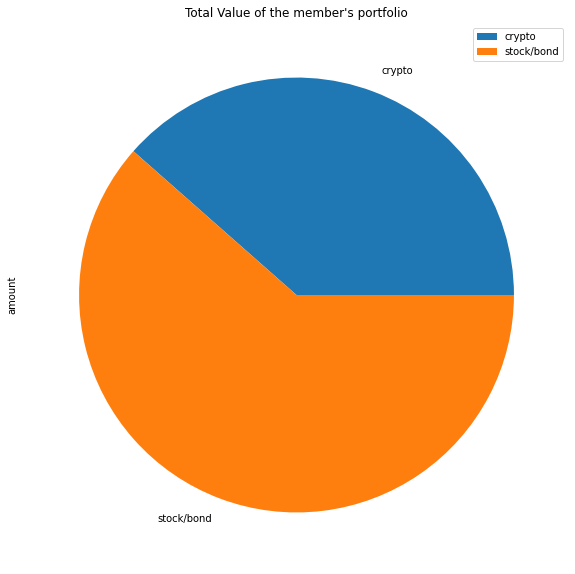

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
saving_df.plot.pie(figsize=(15,10),y="amount",title="Total Value of the member's portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value=3*monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio>emergency_fund_value:
    print("Congratulation! The member having enough money in the fund.")
elif total_portfolio==emergency_fund_value:
    print("Congratulation! The member reached the important financial goal.")
else:
    print(f'There is ${emergency_fund_value-total_portfolio} away before the member can reach the goal.')


Congratulation! The member having enough money in the fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
start_date_2='2019-08-07'
end_date_2='2022-08-07'

In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df_2=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date_2,
    end=end_date_2
).df

# Reorganize the DataFrame
# Separate ticker data
SPY_2=prices_df_2[prices_df_2['symbol']=='SPY'].drop('symbol',axis=1)
AGG_2=prices_df_2[prices_df_2['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
prices_df_2=pd.concat([SPY_2,AGG_2],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
display(prices_df_2.head())
display(prices_df_2.tail())


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-08-07 04:00:00+00:00  284.40  288.8200  282.04  287.97  143723012   
2019-08-08 04:00:00+00:00  289.62  293.6200  289.01  293.62   88075904   
2019-08-09 04:00:00+00:00  292.59  293.2400  289.65  291.62   93729958   
2019-08-12 04:00:00+00:00  289.90  291.6052  287.02  288.07   60895115   
2019-08-13 04:00:00+00:00  287.78  294.1500  287.36  292.55  100693314   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2019-08-07 04:00:00+00:00      668446  286.311024  113.17  113.2900  112.610   
2019-08-08 04:00:00+00:00      406693  291.727950  112.51  112.8200  112.330   
2019-08-09 04:00:00+00:00      451157  291.732496  112.86  112.9500  112.575   
2019-08-12 04:00:00+00:00      324202  288.889779  112.93  113.1850  112.870   
2019-08-13 04:00:00+00:00      490220  292.076183  113.15  113.1504  112.785   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-08-07 04:00:00+00:00  112.68  9156551       37550  112.959111  
2019-08-08 04:00:00+00:00  112.79  3707196       15027  112.586906  
2019-08-09 04:00:00+00:00  112.64  2432292        9508  112.748706  
2019-08-12 04:00:00+00:00  113.05  2246369        8960  113.035477  
2019-08-13 04:00:00+00:00  112.89  3048591       13159  112.925793

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-08-01 04:00:00+00:00  409.16  413.41  408.40  410.77  69633616   
2022-08-02 04:00:00+00:00  409.03  413.00  406.82  408.06  63113622   
2022-08-03 04:00:00+00:00  410.40  415.68  410.00  414.45  67573063   
2022-08-04 04:00:00+00:00  414.25  415.09  412.44  414.17  45565581   
2022-08-05 04:00:00+00:00  409.68  414.15  409.60  413.47  56751151   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-08-01 04:00:00+00:00      516221  411.079113  103.97  104.305  103.910   
2022-08-02 04:00:00+00:00      502751  409.635855  104.27  104.345  103.135   
2022-08-03 04:00:00+00:00      463932  413.267159  103.03  103.640  102.720   
2022-08-04 04:00:00+00:00      364658  414.080458  103.67  103.890  103.570   
2022-08-05 04:00:00+00:00      455450  412.292366  102.81  102.830  102.520   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-01 04:00:00+00:00  104.23  7485387       31215  104.156518  
2022-08-02 04:00:00+00:00  103.16  6866199       38447  103.522777  
2022-08-03 04:00:00+00:00  103.62  6254853       23383  103.276553  
2022-08-04 04:00:00+00:00  103.87  5198972       17078  103.727981  
2022-08-05 04:00:00+00:00  102.71  4847064       16418  102.711038

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30_years= MCSimulation(
    portfolio_data=prices_df_2,
    weights=[.40,.60],
    num_simulation=1000,
    num_trading_days=252*30
    
)

# Review the simulation input data
MC_30_years.portfolio_data.head()


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-08-07 04:00:00+00:00  284.40  288.8200  282.04  287.97  143723012   
2019-08-08 04:00:00+00:00  289.62  293.6200  289.01  293.62   88075904   
2019-08-09 04:00:00+00:00  292.59  293.2400  289.65  291.62   93729958   
2019-08-12 04:00:00+00:00  289.90  291.6052  287.02  288.07   60895115   
2019-08-13 04:00:00+00:00  287.78  294.1500  287.36  292.55  100693314   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-07 04:00:00+00:00      668446  286.311024          NaN  113.17   
2019-08-08 04:00:00+00:00      406693  291.727950     0.019620  112.51   
2019-08-09 04:00:00+00:00      451157  291.732496    -0.006812  112.86   
2019-08-12 04:00:00+00:00      324202  288.889779    -0.012173  112.93   
2019-08-13 04:00:00+00:00      490220  292.076183     0.015552  113.15   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-08-07 04:00:00+00:00  113.2900  112.610  112.68  9156551       37550   
2019-08-08 04:00:00+00:00  112.8200  112.330  112.79  3707196       15027   
2019-08-09 04:00:00+00:00  112.9500  112.575  112.64  2432292        9508   
2019-08-12 04:00:00+00:00  113.1850  112.870  113.05  2246369        8960   
2019-08-13 04:00:00+00:00  113.1504  112.785  112.89  3048591       13159   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-07 04:00:00+00:00  112.959111          NaN  
2019-08-08 04:00:00+00:00  112.586906     0.000976  
2019-08-09 04:00:00+00:00  112.748706    -0.001330  
2019-08-12 04:00:00+00:00  113.035477     0.003640  
2019-08-13 04:00:00+00:00  112.925793    -0.001415

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004105,0.998438,1.001687,1.001304,1.000072,1.000163,0.995788,1.002332,0.993661,1.000941,...,1.006764,0.996633,1.009017,1.001320,1.002649,0.996921,1.001114,0.993297,1.011599,0.998905
2,0.999205,1.008726,1.002236,1.007339,1.000925,1.007245,0.991721,1.006995,0.994951,0.997243,...,1.005974,0.993894,1.009715,1.002942,0.999615,0.999410,1.007873,1.001839,1.010115,1.005725
3,1.008347,1.014277,1.006209,1.010581,0.996067,1.007752,0.986342,1.007456,0.988296,1.000318,...,1.008061,0.992881,1.023075,0.998457,1.001640,1.002070,1.010126,1.017492,1.010766,1.003641
4,1.000527,1.014039,1.009696,1.020182,0.997932,1.008589,0.978014,1.006972,0.988239,0.991156,...,1.012979,1.005420,1.029075,1.004473,0.997947,0.993725,1.001521,1.003817,1.005479,1.001318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.700529,1.247435,5.521545,1.761474,3.112981,1.172686,6.358286,4.194242,2.843305,3.124101,...,6.457881,3.914743,1.577953,2.290543,1.909996,2.920745,2.145030,1.967158,0.803217,9.674016
7557,5.685081,1.244310,5.537634,1.751873,3.097389,1.164092,6.291504,4.154787,2.828682,3.114631,...,6.511032,3.903316,1.565509,2.284912,1.911817,2.917733,2.149463,1.965684,0.809842,9.624851
7558,5.678707,1.241875,5.527003,1.743129,3.093361,1.150942,6.274073,4.142905,2.865384,3.128329,...,6.516135,3.926786,1.544349,2.314433,1.907293,2.925978,2.130031,1.953175,0.811970,9.623710
7559,5.689699,1.249161,5.506777,1.724776,3.095451,1.153016,6.345830,4.149753,2.857116,3.112302,...,6.490464,3.968843,1.559080,2.335858,1.910715,2.935567,2.147008,1.957138,0.805238,9.604103


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

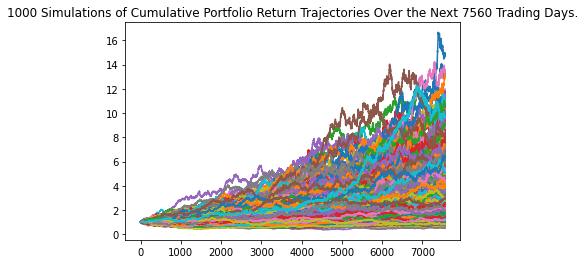

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_30_years.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

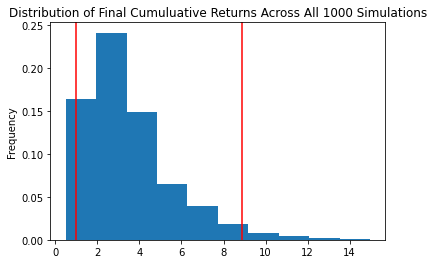

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_years.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30_years_summary=MC_30_years.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_30_years_summary)

count           1000.000000
mean               3.496711
std                2.081950
min                0.490657
25%                1.989052
50%                2.988768
75%                4.384944
max               14.969612
95% CI Lower       0.973790
95% CI Upper       8.897582
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


60688.7

In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_30_years_summary[8]*total_stocks_bonds)
ci_upper_thirty_cumulative_return = round(MC_30_years_summary[9]*total_stocks_bonds)

# Print the result of your calculations
print((f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}."))


There is a 95% chance that an initial investment of $60688.7 in the portfolio over the next 30 years will end within in the range of $ 59098.00 and $ 539983.00.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [39]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10_years=MCSimulation(
    portfolio_data=prices_df_2,
    weights=[.80,.20],
    num_simulation=1000,
    num_trading_days=252*10
)

# Review the simulation input data
MC_10_years.portfolio_data


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2019-08-07 04:00:00+00:00  284.40  288.8200  282.04  287.97  143723012   
2019-08-08 04:00:00+00:00  289.62  293.6200  289.01  293.62   88075904   
2019-08-09 04:00:00+00:00  292.59  293.2400  289.65  291.62   93729958   
2019-08-12 04:00:00+00:00  289.90  291.6052  287.02  288.07   60895115   
2019-08-13 04:00:00+00:00  287.78  294.1500  287.36  292.55  100693314   
...                           ...       ...     ...     ...        ...   
2022-08-01 04:00:00+00:00  409.16  413.4100  408.40  410.77   69633616   
2022-08-02 04:00:00+00:00  409.03  413.0000  406.82  408.06   63113622   
2022-08-03 04:00:00+00:00  410.40  415.6800  410.00  414.45   67573063   
2022-08-04 04:00:00+00:00  414.25  415.0900  412.44  414.17   45565581   
2022-08-05 04:00:00+00:00  409.68  414.1500  409.60  413.47   56751151   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-07 04:00:00+00:00      668446  286.311024          NaN  113.17   
2019-08-08 04:00:00+00:00      406693  291.727950     0.019620  112.51   
2019-08-09 04:00:00+00:00      451157  291.732496    -0.006812  112.86   
2019-08-12 04:00:00+00:00      324202  288.889779    -0.012173  112.93   
2019-08-13 04:00:00+00:00      490220  292.076183     0.015552  113.15   
...                               ...         ...          ...     ...   
2022-08-01 04:00:00+00:00      516221  411.079113    -0.002961  103.97   
2022-08-02 04:00:00+00:00      502751  409.635855    -0.006597  104.27   
2022-08-03 04:00:00+00:00      463932  413.267159     0.015659  103.03   
2022-08-04 04:00:00+00:00      364658  414.080458    -0.000676  103.67   
2022-08-05 04:00:00+00:00      455450  412.292366    -0.001690  102.81   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2019-08-07 04:00:00+00:00  113.2900  112.610  112.68  9156551       37550   
2019-08-08 04:00:00+00:00  112.8200  112.330  112.79  3707196       15027   
2019-08-09 04:00:00+00:00  112.9500  112.575  112.64  2432292        9508   
2019-08-12 04:00:00+00:00  113.1850  112.870  113.05  2246369        8960   
2019-08-13 04:00:00+00:00  113.1504  112.785  112.89  3048591       13159   
...                             ...      ...     ...      ...         ...   
2022-08-01 04:00:00+00:00  104.3050  103.910  104.23  7485387       31215   
2022-08-02 04:00:00+00:00  104.3450  103.135  103.16  6866199       38447   
2022-08-03 04:00:00+00:00  103.6400  102.720  103.62  6254853       23383   
2022-08-04 04:00:00+00:00  103.8900  103.570  103.87  5198972       17078   
2022-08-05 04:00:00+00:00  102.8300  102.520  102.71  4847064       16418   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-07 04:00:00+00:00  112.959111          NaN  
2019-08-08 04:00:00+00:00  112.586906     0.000976  
2019-08-09 04:00:00+00:00  112.748706    -0.001330  
2019-08-12 04:00:00+00:00  113.035477     0.003640  
2019-08-13 04:00:00+00:00  112.925793    -0.001415  
...                               ...          ...  
2022-08-01 04:00:00+00:00  104.156518     0.001537  
2022-08-02 04:00:00+00:00  103.522777    -0.010266  
2022-08-03 04:00:00+00:00  103.276553     0.004459  
2022-08-04 04:00:00+00:00  103.727981     0.002413  
2022-08-05 04:00:00+00:00  102.711038    -0.011168  

[756 rows x 16 columns]

In [40]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016544,1.007660,1.012694,1.012513,0.986918,0.992639,1.006615,0.988971,1.002801,1.004678,...,1.007762,0.993523,0.986939,0.993849,0.993477,0.976469,1.008384,0.984398,1.008879,1.002866
2,1.015909,0.994162,1.031828,1.011002,0.998325,1.005736,1.026925,1.002575,0.991648,1.014341,...,1.007361,1.013868,0.987393,0.996239,0.978464,0.957032,0.996676,0.972804,1.012108,0.974464
3,1.030519,0.999348,1.036289,1.010045,1.013649,0.988886,1.012203,1.011503,1.004484,0.998763,...,0.984184,0.996404,0.973475,0.985109,0.970923,0.937959,0.985333,0.980714,1.017968,0.970838
4,1.028896,0.984102,1.029579,1.003932,1.020354,1.010511,1.015913,1.007496,0.987429,1.015387,...,0.972800,1.020359,0.992067,0.996286,0.967735,0.945901,0.984560,0.979305,1.023797,0.976882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.969773,5.354977,2.890708,3.241607,1.972551,2.345810,1.571489,1.010206,1.496521,5.407772,...,3.410962,4.301892,1.831542,2.277562,2.666708,1.809379,1.230906,3.168657,2.131845,1.022314
2517,1.921674,5.553925,2.849721,3.236459,1.990153,2.379780,1.569971,1.017182,1.505148,5.416441,...,3.400636,4.261055,1.839062,2.249310,2.692121,1.825456,1.263854,3.181703,2.081472,1.056530
2518,1.921147,5.566524,2.848354,3.274207,1.972328,2.438095,1.589850,1.024108,1.483522,5.292796,...,3.404354,4.199205,1.842605,2.249775,2.724777,1.872571,1.284673,3.228281,2.064931,1.045735
2519,1.926736,5.558329,2.849337,3.256645,1.959603,2.412488,1.607443,1.016656,1.472984,5.445181,...,3.396555,4.147977,1.819193,2.261446,2.740988,1.893658,1.274826,3.218070,2.046324,1.029207


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

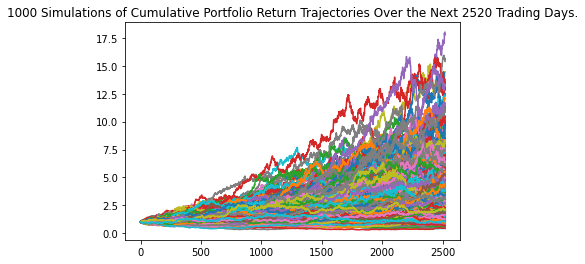

In [41]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_years.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

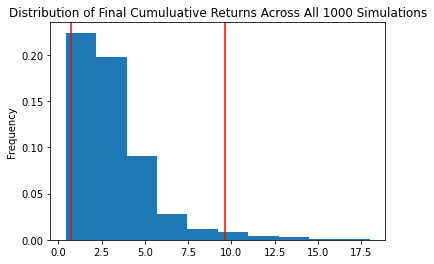

In [42]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_years.plot_distribution()


In [43]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_years_summary=MC_10_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_10_years_summary)

count           1000.000000
mean               3.191048
std                2.235871
min                0.418305
25%                1.698647
50%                2.585976
75%                4.024828
max               18.014684
95% CI Lower       0.722475
95% CI Upper       9.644732
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [44]:
# Print the current balance of the stock and bond portion of the members portfolio
total_stocks_bonds


60688.7

In [47]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_10_years_summary[8]*total_stocks_bonds)
ci_upper_ten_cumulative_return = round(MC_10_years_summary[9]*total_stocks_bonds)

# Print the result of your calculations
print((f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
    f" over the next 10 years will end within in the range of"
    f" ${ci_lower_ten_cumulative_return :.2f} and ${ci_upper_ten_cumulative_return :.2f}."))



There is a 95% chance that an initial investment of $60688.7 in the portfolio over the next 10 years will end within in the range of $43846.00 and $585326.00.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?